# SVR 

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

### Importing the dataset

In [2]:
dataset = pd.read_csv('MLDataSets/SVR/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
Y = dataset.iloc[:, 2].values

### Feature Scaling

In [3]:
# We need to feature scale the dataset because Linear Regression have in-built feature scaler but SVR does not have an in-built feature scaler.

In [4]:
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y.reshape(-1,1))

/home/siva/anaconda3/envs/tok/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/siva/anaconda3/envs/tok/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/siva/anaconda3/envs/tok/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/siva/anaconda3/envs/tok/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting SVR to the dataset

In [5]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, Y)

/home/siva/anaconda3/envs/tok/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### Predicting a new result

In [6]:
# Here we are using arrays to predict so we are transforming 6.5 value into a 2D array.
# Then we are feature scale 6.5 because we are feature scaled other values with the help of x scaled object
# Then we are predicting the value.  But the predicted valued will be feature scaled.
# So we are inverse transform it to get the original value with the help of y scaled object.

In [7]:
Y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
print(Y_pred)

[170370.0204065]


### Visualising the SVR results

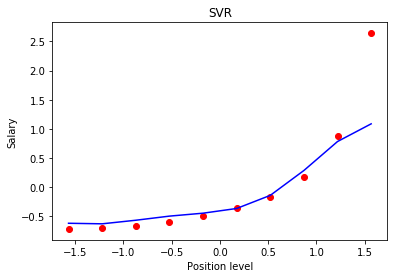

In [8]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Visualising with better curve

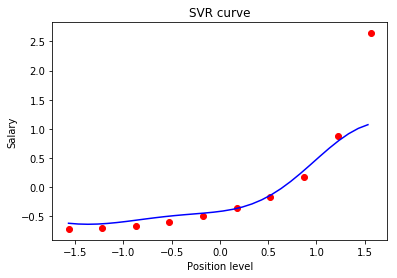

In [9]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SVR curve')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()